# MNIST Classification with NN

In this project, using the **MNIST Dataset** already present in keras we will implement an Artificial Neural Network to provide a multiclass classification on digital images of handwritten digits, 0 to 9.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [90]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

In [91]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualize data

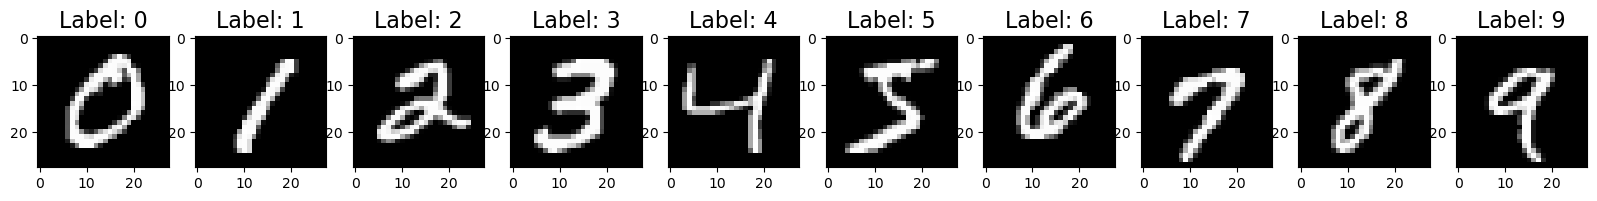

In [92]:
n_classes = 10
f, ax = plt.subplots(1, n_classes, figsize=(20,20))

for i in range(0, n_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [93]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


As we can see from the print above, we need to encode the labels.

## Encode the labels

The output is expressed as a number from 0 to 9, which corresponds to the image shown. Our network will have 10 output nodes, so we need to create 10 different outputs using dummy variables.

In [94]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [95]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Normalize the data

Since these are images, normalization should be performed. Pixel intensity is expressed as a value ranging from 0 to 255, so to normalize we can simply divide by 255

In [96]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [97]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


The input shape is then 784, the dimension of the flatten image.

# Create the model

Now we can create our model. To perform a multiclass classification we must set the **softmax** as the output layer activation function and the number of classes as the number of nodes.

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [99]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
model.fit(x=x_train, y=y_train, batch_size=512, epochs=10)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.5943 - accuracy: 0.8271
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9352
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9524
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1305 - accuracy: 0.9618
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9727
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9765
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9812
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9846

## Evaluate the model

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 691us/step - loss: 0.0774 - accuracy: 0.9763
Test Loss: 0.077414371073246, Test Accuracy: 0.9763000011444092


In [104]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 556us/step
[[3.3581108e-07 4.1667618e-06 1.1783638e-05 ... 9.9984181e-01
  9.2549897e-07 1.1690141e-05]
 [1.5795049e-08 1.3703955e-05 9.9996972e-01 ... 2.5784129e-08
  2.4106312e-06 1.0855611e-10]
 [6.6780340e-06 9.9713171e-01 9.3495316e-04 ... 1.2920164e-03
  2.9411455e-04 8.2736997e-06]
 ...
 [1.6329931e-09 9.2589381e-08 3.5723131e-09 ... 5.6204510e-05
  4.4069921e-07 6.4186311e-06]
 [3.4978086e-08 7.6947391e-09 2.2574020e-09 ... 2.1378828e-07
  7.6728291e-05 1.9867402e-08]
 [7.0751418e-09 2.2006406e-09 2.6995913e-08 ... 1.3068265e-09
  7.8788087e-10 1.3068925e-11]]
[7 2 1 ... 4 5 6]


## Confusion Matrix

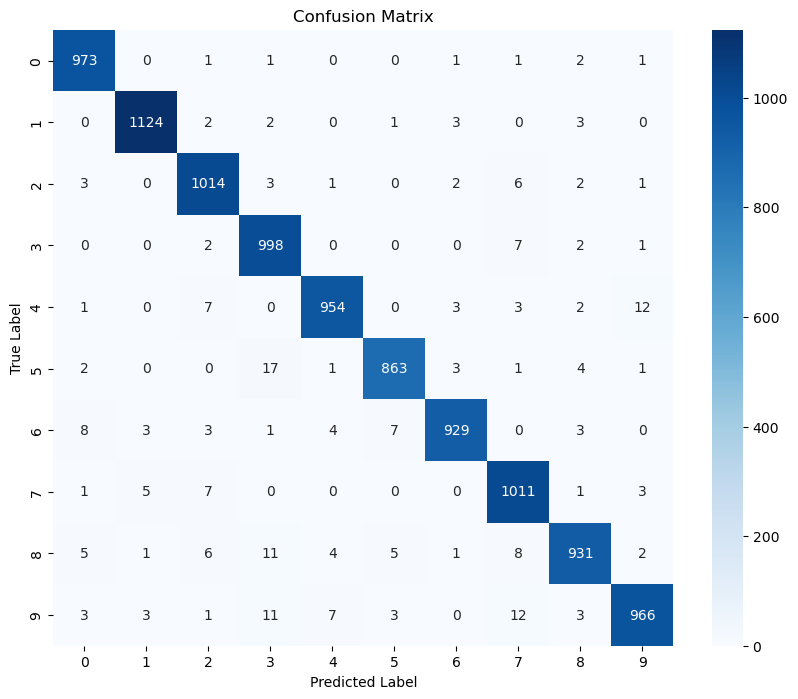

In [105]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

Let's take a look at some examples in which our model misclassified.

In [106]:
y_true = np.argmax(y_test, axis=1)

errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_true_errors = y_true[errors]

Predicted label :9
True label: 4


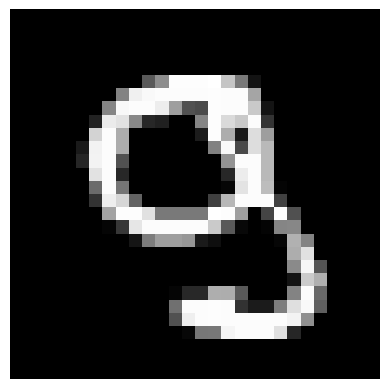

Predicted label :9
True label: 2


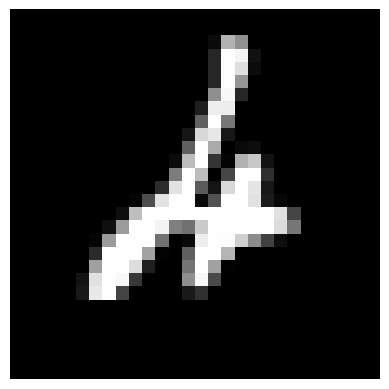

Predicted label :5
True label: 6


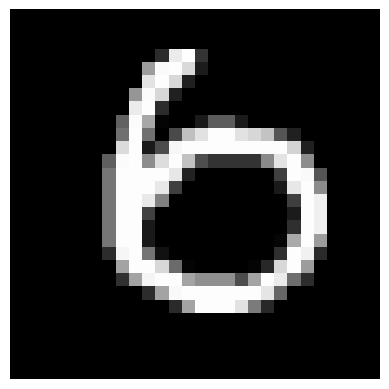

In [107]:
for i in range(0, 3):
    sample = x_test_errors[i].reshape(28,28)
    y_t = y_true_errors[i]
    y_p = y_pred_classes_errors[i]
    print("Predicted label :{}\nTrue label: {}".format(y_p, y_t))
    plt.imshow(sample, cmap="gray")
    plt.axis('off')
    plt.show()